¡Hola a continuacion se muestran los resultados de la simulación! 😀 

Tiempo total en el sistema de todos los clientes: 239.14 minutos
Tiempo promedio que un cliente pasa en el sistema: 0.68 minutos


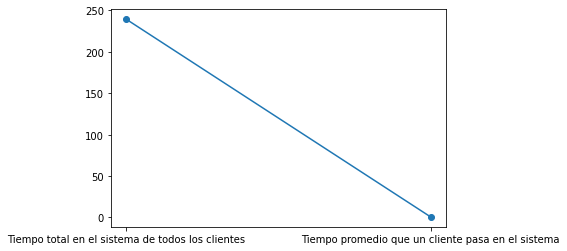

Cantidad promedio de clientes en el sistema: 43.98
Cantidad total de clientes que ingresaron en 8 horas: 352


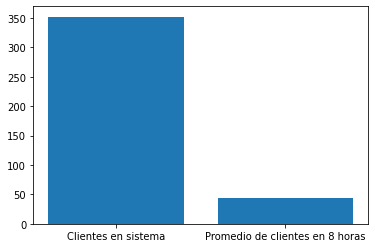

In [1]:
import heapq
import math
import matplotlib.pyplot as plt


# Configuración de los parámetros del generador congruencial multiplicativo
semilla = 97
constante_multiplicativa = 109
modulo = 32768

# Función para generar números aleatorios utilizando el método congruencial multiplicativo
def generar_aleatorio():
    global semilla
    semilla = (constante_multiplicativa * semilla) % modulo
    return semilla / modulo

# Configuración de los parámetros del generador de llegadas
tasa_llegada = 60 / 40  # convertir a llegadas por minuto

# Función para generar tiempo entre llegadas
def generar_llegada():
    llegada = -1 / tasa_llegada * math.log(generar_aleatorio())
    return llegada 

# Configuración de los parámetros del generador de tiempos de transacciones
a = 0  # Tiempo mínimo entre transacciones
b = 1# Tiempo máximo entre transacciones

# Función para generar tiempo de transacciones entre el cajero y el cliente.
def generar_transaccion():
    global a 
    global b 
    tiempo_transaccion = a + (b - a) * generar_aleatorio()
    return tiempo_transaccion


# Configuración de los parámetros de la simulación
num_atms = 3
cola = []
reloj = 0
siguiente_tiempo_llegada = generar_llegada()
siguiente_tiempo_salida = [float('inf')] * num_atms
atms_ocupados = 0

# Inicializar variables para el cálculo de estadísticas
tiempo_total_en_sistema = 0
num_total_clientes = 0

# Mensajes de la simulación
bienvenida = "¡Hola a continuacion se muestran los resultados de la simulación! 😀 "
print(bienvenida)

# Ejecutar la simulación durante 8 horas (480 minutos)
tiempo_simulacion = 480
while reloj < tiempo_simulacion:
    # Avanzar el reloj al siguiente tiempo de evento
    reloj = min(siguiente_tiempo_llegada + 1, min(siguiente_tiempo_salida))

    if siguiente_tiempo_llegada < min(siguiente_tiempo_salida):
        # Llega un cliente
        # print("----> Llegó un cliente")
        if atms_ocupados < num_atms:
            # Asignar un cajero automático disponible al cliente
            atms_ocupados += 1
            cajero = siguiente_tiempo_salida.index(float('inf'))
            tiempo_servicio = generar_transaccion()
            siguiente_tiempo_salida[cajero] = reloj + tiempo_servicio
            # print("*** Un cliente utilizó un cajero")
        else:
            # Todos los cajeros automáticos están ocupados, el cliente se une a la cola
            heapq.heappush(cola, reloj)
            # print("## Un cliente se unió a la cola de espera")
        # Programar la próxima llegada
        siguiente_tiempo_llegada = reloj + generar_llegada()
    else:
        # Un cliente termina su transacción
        num_total_clientes += 1
        tiempo_total_en_sistema += min(siguiente_tiempo_salida) - siguiente_tiempo_llegada
        cajero = siguiente_tiempo_salida.index(min(siguiente_tiempo_salida))
        siguiente_tiempo_salida[cajero] = float('inf')
        if len(cola) > 0:
            # Asignar el próximo cliente en la cola al cajero automático
            siguiente_tiempo_cliente = heapq.heappop(cola)
            tiempo_servicio = generar_transaccion()
            siguiente_tiempo_salida[cajero] = max(reloj, siguiente_tiempo_cliente) + tiempo_servicio
            # print("*** Un cliente utilizó un cajero")
        else:
            # No hay clientes en la cola, el cajero automático queda libre
            atms_ocupados -= 1
            # print("<- Un cliente dejó el cajero libre")


# Calcular las estadísticas
tiempo_promedio_en_sistema = abs(tiempo_total_en_sistema / num_total_clientes)
num_promedio_clientes = num_total_clientes / (reloj / 60)

# Imprimir los resultados
print()  # Salto de línea

#Graficas
print(f"Tiempo total en el sistema de todos los clientes: {abs(tiempo_total_en_sistema):.2f} minutos")
print(f"Tiempo promedio que un cliente pasa en el sistema: {tiempo_promedio_en_sistema:.2f} minutos")
concepto = ['Tiempo total en el sistema de todos los clientes', 'Tiempo promedio que un cliente pasa en el sistema']
tiempos = [abs(tiempo_total_en_sistema), tiempo_promedio_en_sistema]
plt.plot(concepto, tiempos,  marker="o")
plt.show()

print(f"Cantidad promedio de clientes en el sistema: {num_promedio_clientes:.2f}")
print(f"Cantidad total de clientes que ingresaron en 8 horas: {num_total_clientes}")
# print(f"Numero de veces que se utilizaron los cajeros: {abs(tiempo_total_en_sistema):.2f}")

conceptocantidades =['Clientes en sistema', 'Promedio de clientes en 8 horas']
cantidades =[num_total_clientes, num_promedio_clientes,]
plt.bar(conceptocantidades, cantidades)
plt.show()
